# 2.3.4. Bài tập thực hành 2: Xây dựng mô hình Naïve Bayes trên tập dữ liệu Mushroom

**Mô tả bài toán:** Sử dụng dataset Mushroom để xây dựng mô hình Naive Bayes phân loại nấm có độc (class = p) hay ăn được (class = e), dựa trên các đặc trưng categorical như cap-shape, cap-surface, cap-color, v.v.

**Nhiệm vụ chính:**
1. Tải và khám phá dữ liệu.
2. Tiền xử lý dữ liệu (encode categorical features).
3. Xây dựng mô hình Gaussian Naive Bayes (phù hợp với features categorical sau encode).
4. Đánh giá mô hình (accuracy, classification report, confusion matrix).

**Lưu ý:** Dataset 'mushrooms.csv' đã được cung cấp. Giả sử file đã tải về thư mục làm việc. Tất cả features đều categorical, sẽ dùng LabelEncoder.

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully.")

Libraries imported successfully.


Dataset shape: (8124, 23)

Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Head:
   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c 

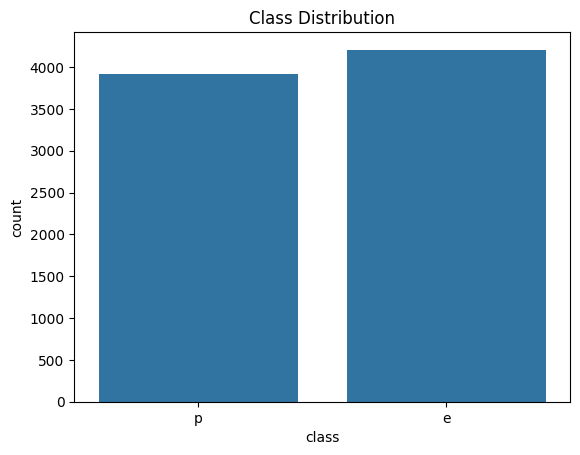

In [2]:
# 2. Tải dữ liệu và khám phá
df = pd.read_csv('mushrooms.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nHead:\n", df.head())

# EDA ngắn gọn
print("\nMissing values:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['class'].value_counts(normalize=True))

# Visualize class distribution
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

In [3]:
# 3. Tiền xử lý dữ liệu
# Encode target: e=0, p=1
le_target = LabelEncoder()
df['class_encoded'] = le_target.fit_transform(df['class'])
y = df['class_encoded']

# Features: tất cả trừ 'class'
features = df.columns[1:]  # Bỏ 'class'
X = df[features]

# Encode tất cả features categorical bằng LabelEncoder
label_encoders = {}
for col in features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split train/test (80/20, stratify để cân bằng class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Preprocessing done.")
print("X_train shape:", X_train.shape)
print("Class balance in train:", np.bincount(y_train))

Preprocessing done.
X_train shape: (6499, 23)
Class balance in train: [3366 3133]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13576\856854851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13576\856854851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13576\856854851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [4]:
# 4. Xây dựng mô hình Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Khởi tạo và train mô hình
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Naive Bayes model trained.")

Naive Bayes model trained.


Accuracy: 1.0000

Classification Report:
                precision    recall  f1-score   support

   Edible (e)       1.00      1.00      1.00       842
Poisonous (p)       1.00      1.00      1.00       783

     accuracy                           1.00      1625
    macro avg       1.00      1.00      1.00      1625
 weighted avg       1.00      1.00      1.00      1625



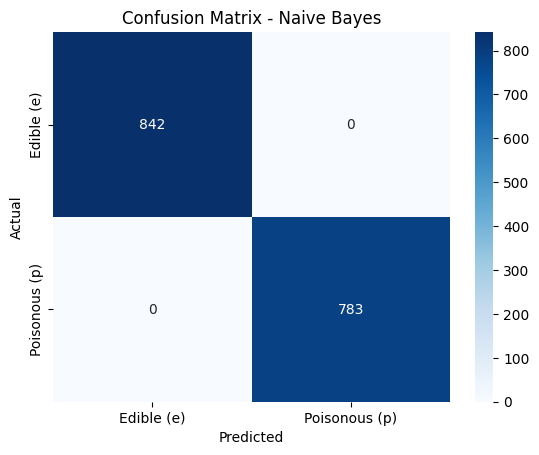

In [5]:
# 5. Đánh giá hiệu quả của mô hình
# Predict trên test
y_pred = nb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Edible (e)', 'Poisonous (p)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible (e)', 'Poisonous (p)'], yticklabels=['Edible (e)', 'Poisonous (p)'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()